In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

import acquire
import prepare

In [4]:
#acquire
df = acquire.get_store_item_demand_data()

#prepare
df = prepare.prep_store_data(df)
df.head(5)

,item_id,quantity,sale_id,store_id,store_address,store_city,store_state,store_zipcode,item_brand,item_name,item_price,item_upc12,item_upc14,month,dow,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,01-Jan,2-Tue,10.92
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,218.40
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,TX,78217,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,01-Jan,2-Tue,125.55
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,TX,78232,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,453.60
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,TX,78221,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,01-Jan,2-Tue,294.00


In [5]:
df.index.value_counts()

2013-01-01    500
2016-05-11    500
2016-05-09    500
2016-05-08    500
2016-05-07    500
             ... 
2014-08-29    500
2014-08-28    500
2014-08-27    500
2014-08-26    500
2017-12-31    500
Name: sale_date, Length: 1826, dtype: int64

## Split the data

In [6]:
#look at the range of the index 
#four total years of data 
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

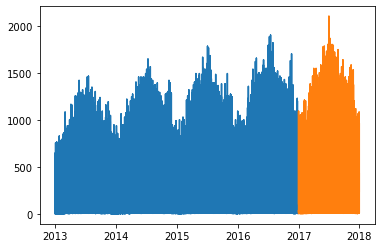

In [7]:
#train test split 
#75% train, 25% test 
#split the data with everything up to 2016 
#test is only 2017 
train = df[:'2016'] 
test = df['2017']

plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

Key Takeaways:
- 3 years of training data, 1 year of test data
- Test data is most recent

In [8]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

In [9]:
train.groupby('month').describe()

item_id                                               quantity  \
          count  mean        std  min   25%   50%   75%   max    count   
month                                                                    
01-Jan  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
02-Feb  56500.0  25.5  14.430997  1.0  13.0  25.5  38.0  50.0  56500.0   
03-Mar  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
04-Apr  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
05-May  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
06-Jun  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
07-Jul  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
08-Aug  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
09-Sep  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
10-Oct  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   
11-Nov  60000.0  25.5  14.430990  1.0  13.0  25.5  38.0  50.0  60000.0   
12-Dec  62000.0  25.5  14.430986  1.0  13.0  25.5  38.0  50.0  62000.0   

                   ...    item_upc14               sales_total              \
             mean  ...           75%           max       count        mean   
month              ...                                                       
01-Jan  34.449081  ...  6.030842e+11  8.846237e+11     62000.0  185.232810   
02-Feb  38.138195  ...  6.030842e+11  8.846237e+11     56500.0  205.001723   
03-Mar  45.863145  ...  6.030842e+11  8.846237e+11     62000.0  246.694359   
04-Apr  53.293417  ...  6.030842e+11  8.846237e+11     60000.0  286.463914   
05-May  57.447597  ...  6.030842e+11  8.846237e+11     62000.0  308.932679   
06-Jun  61.038117  ...  6.030842e+11  8.846237e+11     60000.0  328.098415   
07-Jul  64.854839  ...  6.030842e+11  8.846237e+11     62000.0  348.595409   
08-Aug  57.326645  ...  6.030842e+11  8.846237e+11     62000.0  308.319972   
09-Sep  53.253233  ...  6.030842e+11  8.846237e+11     60000.0  286.252615   
10-Oct  49.618710  ...  6.030842e+11  8.846237e+11     62000.0  266.773078   
11-Nov  53.541983  ...  6.030842e+11  8.846237e+11     60000.0  287.761324   
12-Dec  37.994161  ...  6.030842e+11  8.846237e+11     62000.0  204.265461   

                                                           
               std   min     25%     50%     75%      max  
month                                                      
01-Jan  145.229766  0.00   66.23  159.40  268.15  1093.20  
02-Feb  160.234470  1.68   73.06  176.22  295.74  1065.87  
03-Mar  191.781349  3.00   89.10  212.39  354.38  1421.16  
04-Apr  222.392366  5.04  103.59  247.26  411.60  1658.02  
05-May  239.286350  5.04  112.40  267.24  444.86  1512.26  
06-Jun  253.623315  5.04  119.07  283.65  472.29  1667.13  
07-Jul  269.758461  5.88  126.36  301.32  503.40  1903.99  
08-Aug  238.639841  4.20  112.40  267.00  443.44  1557.81  
09-Sep  221.852486  4.20  103.62  247.59  411.60  1466.71  
10-Oct  207.425551  3.36   96.16  228.80  384.48  1430.27  
11-Nov  222.847403  4.20  104.16  248.40  414.70  1703.57  
12-Dec  159.443617  0.84   73.06  176.19  294.15  1229.85  

[12 rows x 72 columns]

<AxesSubplot:xlabel='month', ylabel='sales_total'>

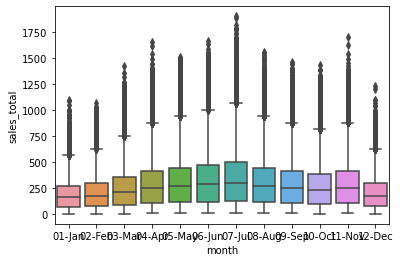

In [10]:
# boxplot for each month
sns.boxplot(data = train, x = 'month', y = 'sales_total')

In [11]:
sns.barplot(data=train, x='day_of_week', y='sales_total', color='steelblue')\
    .set(title='Average Sales by Day of Week')

ValueError: Could not interpret input 'day_of_week'